In [9]:
%matplotlib notebook

import scipy
from scipy import stats
import numpy as np
import glob, os
import pandas as pd
import matplotlib.pyplot as plt

import dissolution_experiment as dise

from jupyterthemes import jtplot
jtplot.reset()

porous_dir = '/home/fdutka/porous'

In [10]:
df = pd.read_csv("btime.csv", index_col = 0)
df

,ht,h0,cv,Pe,Da,hmax,hmax_sim,cv_sim,W,dt,cv_sim2,cv_sim2_perc,NX,dx,Pe_sim,Da_sim,dx_sim,btime,btime_h
btime1,100.0,110.0,0.04545,8.417508,0.061028,600.0,5.454545,0.053404,33,0.1,0.045446,0.999906,256,1.171875,8.418,0.06100,1.172000,417,109.723934
btime2,70.0,80.0,0.06250,8.417508,0.044384,570.0,7.125000,0.073438,33,0.1,0.062453,0.999250,256,1.611328,8.418,0.04440,1.611000,465,88.984747
btime3,50.0,60.0,0.08333,8.417508,0.033288,550.0,9.166667,0.097913,33,0.1,0.083270,0.999285,256,2.148438,8.418,0.03330,2.148000,515,73.914750
btime4,30.0,40.0,0.12500,8.417508,0.022192,530.0,13.250000,0.146875,33,0.1,0.124829,0.998631,256,3.222656,8.418,0.02220,3.223000,616,58.940435
btime5,20.0,30.0,0.16667,8.417508,0.016644,520.0,17.333333,0.195837,33,0.1,0.166166,0.996973,256,4.296875,8.418,0.01660,4.297000,721,51.740325
btime6,10.0,20.0,0.25000,8.417508,0.011096,510.0,25.500000,0.293750,33,0.1,0.248436,0.993745,256,6.445312,8.418,0.01110,6.445000,950,45.449199
btime7,0.0,10.0,0.50000,8.417508,0.005548,500.0,50.000000,0.587500,33,0.1,0.488096,0.976191,256,12.890625,8.418,0.00555,12.890000,1769,42.315596
btime8,150.0,160.0,0.03125,8.417508,0.088767,650.0,4.062500,0.036719,33,0.1,0.031237,0.999600,256,0.805664,8.417,0.08880,0.805664,373,142.758326
btime9,200.0,210.0,0.02381,8.417508,0.116507,700.0,3.333333,0.027977,33,0.1,0.023834,1.000995,256,0.613839,8.417,0.11700,0.613800,346,173.807305


In [18]:
df_exp = pd.read_csv("BTime_exps_staszeq.csv")
df_exp

,Exp,Aperture,BT [h],CV,cv500,computer,date,video,remark
0,1-a,100,99.0,0.037168,0.067084,Leon,2017-08-17,5L_2017-08-17.avi,ok
1,1-b,100,107.0,0.037168,0.067084,Leon,2017-08-22,6L_2017-08-22.avi,ok
2,2,70,96.0,0.050602,0.091687,Hals,2017-05-25,1H_2017-05-25.avi,ok
3,3,50,88.0,0.066667,0.121359,Leon,2017-06-29,2L_2017-06-29b.avi,ok
4,4,30,77.4,0.097674,0.179426,Hals,2017-06-29,3H_2017-06-29.avi,ok
5,5-a,0,53.0,0.323077,0.635593,Leon,2017-08-02,4L_2017-08-02.avi,zapowietrzony
6,6,0,64.0,0.323077,0.635593,Hals,2016-05-18,22H_2016-05-18.avi,Floriana


<IPython.core.display.Javascript object>


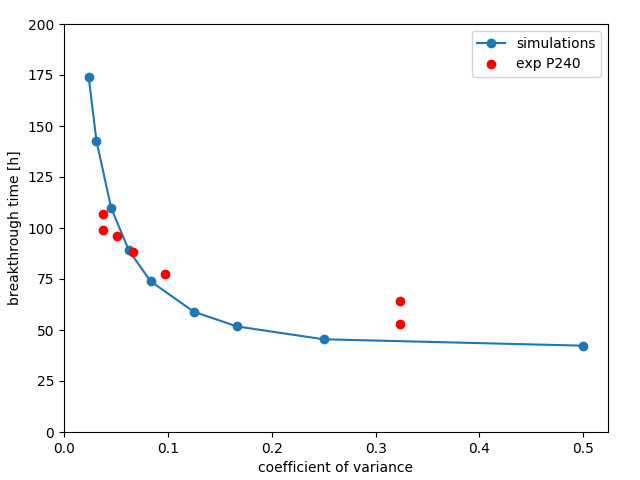

In [36]:
df_exp['cv3'] = df_exp.apply(lambda x: 4.2/(13+x.Aperture), axis = 1)

df2 = df.sort_values(by = 'cv')[['cv','btime_h','h0','ht']]

fig2 = plt.figure()
ax = fig2.add_axes([.1,.1,.85,.85])

ax.plot(df2.cv, df2.btime_h, '-o', label = "simulations")
ax.plot(df_exp["CV"], df_exp["BT [h]"], 'ro', label = "exp P240")
#ax.plot(df_exp["cv500"], df_exp["BT [h]"], 'go', label = "P500")
#ax.plot(df_exp["cv3"], df_exp["BT [h]"], 'ko', label = "fit")

ax.axes.set_xlabel('coefficient of variance')
#ax.axes.set_xlabel('aperture [um]')
ax.axes.set_ylabel('breakthrough time [h]')
ax.legend()
ax.set_ylim([0,200])
fig2.savefig('sims_vs_exp.png', dpi = 300)
plt.ion()
fig2.show()